# Trump pays Trump

Analysis was done using FEC data from the period of 01/01/2015 to 10/03/2016.

**Conclusions**
* The Trump campaign has reimbursed about 2.24% of all spending to entities that have "Trump" in the name. In absolute terms, that represents 2,153,371.43 out of a total spending of 96,161,847.31
* The single largest recipient is "TRUMP TOWER COMMERCIAL LLC", which recieved 881,250.31. The next largest is "TRUMP, DONALD J" who was paid 494,963.31.
* Though "TRUMP, DONALD JR", "TRUMP, DONALD JR.", and "TRUMP, ERIC" are recipients, there is no mention of Ivanka.

**Open questions**
* Is it common for a presidential candidate to pay themselves directly from the campaign?

**Data sources**
* [Trump campaign spending](https://beta.fec.gov/data/disbursements/?two_year_transaction_period=2016&committee_id=C00580100&min_date=01%2F01%2F2015&max_date=10%2F03%2F2016)
* [Trump campaign spending to recipients with "Trump" in their name](https://beta.fec.gov/data/disbursements/?two_year_transaction_period=2016&committee_id=C00580100&recipient_name=trump&min_date=01%2F01%2F2015&max_date=10%2F03%2F2016)

In [153]:
import matplotlib
import pandas as pd
%matplotlib inline

In [154]:
paid_to_trump = pd.read_csv('data/trump-recipient.csv', parse_dates=['report_year'])
all_paid = pd.read_csv('data/all-recipients.csv', parse_dates=['report_year'])

In [159]:
sum_to_trump = paid_to_trump['disbursement_amount'].sum()
sum_all = all_paid['disbursement_amount'].sum()
percent_to_trump = (sum_to_trump / sum_all) * 100
print("percent of campaigin spending that goes to Trump recipients: %.2f" % percent_to_trump)
print("which is equal to %s of %s" % (sum_to_trump, sum_all))

percent of campaigin spending that goes to Trump recipients: 2.24
which is equal to 2153371.43 of 96161847.31


In [156]:
summed = paid_to_trump.groupby('recipient_name').sum()
summed.reset_index(inplace=True)
tower_sum = summed[summed['recipient_name'] == 'TRUMP TOWER COMMERCIAL LLC']['disbursement_amount']
djt_sum = summed[summed['recipient_name'] == 'TRUMP, DONALD J.']['disbursement_amount']
print("\"TRUMP TOWER COMMERCIAL LLC\" was paid %.2f" % tower_sum)
print("\"TRUMP, DONALD J.\" was paid %.2f" % djt_sum)

"TRUMP TOWER COMMERCIAL LLC" was paid 881250.31
"TRUMP, DONALD J." was paid 494963.31


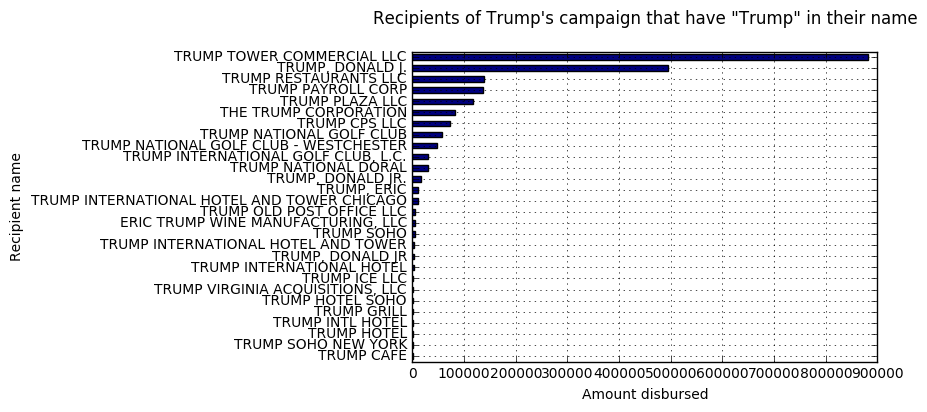

In [165]:
summed_title = 'Recipients of Trump\'s campaign that have "Trump" in their name\n'
summed_all = summed[['recipient_name', 'disbursement_amount']]
summed_all.set_index(['recipient_name'], inplace=True)
summed_all_plot = summed_all.sort_values(by='disbursement_amount').plot(colormap='jet', grid=True, kind='barh', legend=False, title=summed_title)
summed_all_plot.set_xlabel('Amount disbursed')
summed_all_plot.set_ylabel('Recipient name')

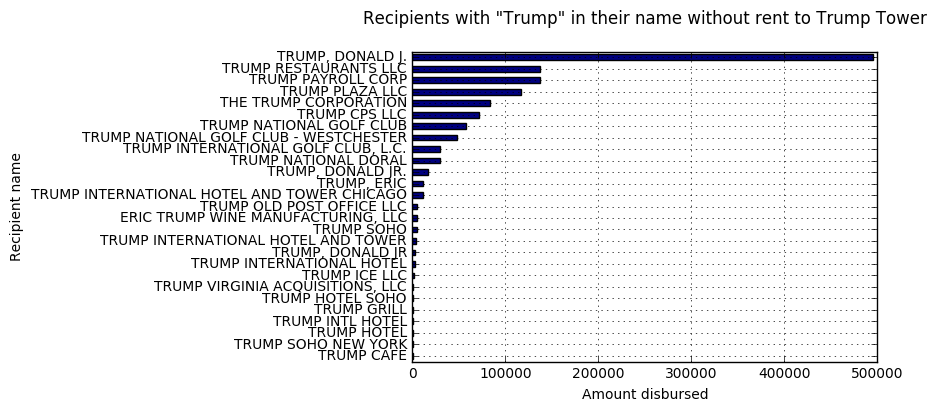

In [175]:
without_tower_title = 'Recipients with "Trump" in their name without rent to Trump Tower\n'
without_tower = summed[summed['recipient_name'] != 'TRUMP TOWER COMMERCIAL LLC'][['recipient_name', 'disbursement_amount']]

without_tower.set_index(['recipient_name'], inplace=True)
without_tower_plot = without_tower.sort_values(by='disbursement_amount').plot(colormap='jet', grid=True, kind='barh', legend=False, title=without_tower_title)
without_tower_plot.set_xlabel('Amount disbursed')
without_tower_plot.set_ylabel('Recipient name')
